In [1]:
import numpy as np
import pylab as pl
import seaborn as sb

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Functions

In [12]:
def islendingur():
    bakgrunnsuppl = input_bakgrunnsuppl()
    tekjur_e_skatt, stadgreidsla, lifeyrisgreidsla, sereignarlifeyrisgr = stadgreidsla_func(bakgrunnsuppl)
    husnaedisstudningur, husn_eignaskerding, husn_tekjuskerding =\
        husnaedisstudningur_func(bakgrunnsuppl)
    if bakgrunnsuppl['hjuskaparstada'] != 1:
        barnabaetur = barnabaetur_func(bakgrunnsuppl)
    else: barnabaetur = 0
    
    if bakgrunnsuppl['tekjur'][0] >= 1678001/12:
        utvarpsgjald = 16800/12
    else: utvarpsgjald = 0
    
    netto = tekjur_e_skatt + husnaedisstudningur + barnabaetur - utvarpsgjald
    
    nidurstodur = {'tekjur': bakgrunnsuppl['tekjur'],\
                   'tekjur_e_skatt': tekjur_e_skatt,\
                   'stadgreidsla': stadgreidsla,\
                   'lifeyrisgreidsla': (lifeyrisgreidsla+sereignarlifeyrisgr),\
                   'husnaedisstudningur': husnaedisstudningur,\
                   'barnabaetur': barnabaetur,\
                   'utvarpsgjald': utvarpsgjald,\
                   'pjeng_i_vasa': netto}
    
    return nidurstodur, bakgrunnsuppl

In [15]:
def input_bakgrunnsuppl():
    # HJÚSKAPARSTAÐA
    # =======================================================
    hjuskaparstada = 4
    while hjuskaparstada >3 or hjuskaparstada <1:
        hjuskaparstada = int(raw_input('1: einhleypur, 2: einst. foreldri, 3: giftur/sambud '))
    
    # BÚSETUFORM
    # =======================================================
    print "Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?"
    husn = 4
    while husn >3 or husn <1:
        husn = int(raw_input('1: eigin, 2: leigu, 3: hvorugt '))
    
    # TEKJUR OG IÐGJALD
    # =======================================================
    laun_a_manudi = int(raw_input("Laun fyrir skatt: "))
    fjarmagnstekjur = int(raw_input("Fjarmagnstekjur: "))
    
    print "	Iðgjald í lífeyrissjóð?"
    idgjald = 3
    while idgjald >2 or idgjald <1:
        idgjald = int(raw_input('1: 0%, 2: 4% '))
    if idgjald == 1:
        idgjald = 0.0
    elif idgjald == 2:
        idgjald = 0.04
            
    print "	Iðgjald í séreign?"
    sereignaridgjald = 5
    while sereignaridgjald >4 or sereignaridgjald <0:
        sereignaridgjald = int(raw_input('0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% '))
    sereignaridgjald = sereignaridgjald / 100.0
    
    if hjuskaparstada == 3:
        laun_maka = int(raw_input("Laun maka fyrir skatt: "))
        fjarmagnstekjur_maka = int(raw_input("Fjarmagnstekjur maka: "))
    else:
        laun_maka = 0
        fjarmagnstekjur_maka = 0
    tekju_uppl = [laun_a_manudi, fjarmagnstekjur, laun_maka, fjarmagnstekjur_maka]
    
    # EIGNIR
    # =======================================================
    if hjuskaparstada == 3:
        print "Allar eignir (samanlagðar eignir hjóna) að frádregnum öllum skuldum. 
        print "Með eignum skal telja hlutabréf, innstæður og verðbréf: "
    else:
        print "Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: "
    eignir = int(raw_input())
    
    # HÚSNÆÐISBREYTUR
    # =======================================================
    if husn == 1:   
        print 'Eftirstöðvar í árslok af lánum sem tekin hafa verið til öflunar íbúðarhúsnæðis til eigin nota: '
        eftirstodvar = int(raw_input())
        print "Vextir og verðbætur af íbúðarlánum á ársgrundvelli, þ.m.t. dráttarvextir og lántökukostnaður: "
        vaxtagjold = int(raw_input())
    else:
        eftirstodvar = 0
        vaxtagjold = 0
    if husn == 2:
        fjoldi_heimilismanna = int(raw_input("fjoldi heimilismanna ad ther medtoldum: "))
        if fjoldi_heimilismanna > 4:
            fjoldi_heimilismanna = 4
        if fjoldi_heimilismanna == 1:
            heimilistekjur = (tekju_uppl[0] + tekju_uppl[1])
            heimiliseignir = eignir
        elif fjoldi_heimilismanna == 2 and hjuskaparstada == 3:
            heimilistekjur = sum(tekju_uppl)
            heimiliseignir = eignir
        else:
            heimilistekjur = int(raw_input('samanlagdar manadartekjur allra heimilismanna: '))
            heimiliseignir = int(raw_input('samanlagdar eignir allra heimilismanna: '))
        husnaediskostnadur = int(raw_input('manadarlegur husnaediskostnadur: '))
    else: 
        fjoldi_heimilismanna = 0
        heimilistekjur = 0
        heimiliseignir = 0
        husnaediskostnadur = 0
        
    # BÖRN
    # =======================================================
    if hjuskaparstada != 1:    
        print "Fjöldi barna á heimli: "
        fj_barna = int(raw_input())
        if fj_barna != 0:
            print " - þar af yngri en 7 ára: "
            fj_barna_undir_7 = fj_barna + 1
            while fj_barna_undir_7 > fj_barna:
                fj_barna_undir_7 = int(raw_input())
        elif fj_barna == 0:
            fj_barna_undir_7 = 0
        if fj_barna > 3:
            fj_barna = 3
    else:
        fj_barna = 0
        fj_barna_undir_7 = 0
    
    bakgrunnsuppl = {'hjuskaparstada': hjuskaparstada,\
                    'busetuform': husn,\
                    'tekjur': tekju_uppl,\
                    'eignir': eignir,\
                    'husnaedislan': eftirstodvar,\
                    'vaxtagjold': vaxtagjold,\
                    'husnaediskostnadur': husnaediskostnadur,\
                    'fjoldi_heimilismanna': fjoldi_heimilismanna,\
                    'heimilistekjur': heimilistekjur,\
                    'heimiliseignir': heimiliseignir,\
                    'fjoldi_barna': fj_barna,\
                    'fjoldi_barna_undir_7': fj_barna_undir_7,\
                    'idgjald': idgjald,\
                    'sereignaridgjald': sereignaridgjald
                    }
    
    return bakgrunnsuppl

SyntaxError: EOL while scanning string literal (<ipython-input-15-f70934610be8>, line 46)

In [4]:
def stadgreidsla_func(info):
    
    skattthrep = 834707
    skatthlutfall_nedra = 0.3694
    skatthlutfall_efra = 0.4624
    personuafsl = 52907
    
    lifeyrir = (info['tekjur'][0] * info['idgjald'])
    serlifeyrir = (info['tekjur'][0] * info['sereignaridgjald'])
    
    stofn = info['tekjur'][0] - lifeyrir - serlifeyrir
    
    if stofn <= skattthrep:
        skattstofn_1 = stofn
        skattstofn_2 = 0
    else:
        skattstofn_1 = skattthrep
        skattstofn_2 = stofn - skattthrep
        
    skattur_nedra_threp = (skattstofn_1*skatthlutfall_nedra)
    skattur_efra_threp = (skattstofn_2*skatthlutfall_efra)
    
    reiknud_stadgreidsla = skattur_nedra_threp + skattur_efra_threp
    stadgreidsla_alls = reiknud_stadgreidsla - personuafsl
    
    laun_e_skatt = stofn - stadgreidsla_alls
    
    return laun_e_skatt, stadgreidsla_alls, lifeyrir, serlifeyrir        

In [5]:
def husnaedisstudningur_func(info):

    if info['busetuform'] == 1:      
        studningur = vaxtabaetur_func(info)
        
    elif info['busetuform'] == 2:
        studningur = husnaedisbaetur_func(info)
        
    else:
        studningur = 0
    
    return studningur

In [6]:
def vaxtabaetur_func(info):
    
    hamark_vaxtagjalda = [800000, 1000000, 1200000] #fyrir: [einstakling, einstætt foreldri, hjón]
    hamark_bota = [400000, 500000, 600000] #fyrir: [einstakling, einstætt foreldri, hjón]
    tekjur_yearly = [info['tekjur'][0]*12,\
                     info['tekjur'][1]*12,\
                     info['tekjur'][2]*12,\
                     info['tekjur'][3]*12]
    
    eignaskerdingarmork_nedri = [4500000.0, 4500000.0, 7300000.0] #fyrir: [einstakling, einstætt foreldri, hjón]
    eignaskerdingarmork_efri = [7200000.0, 7200000.0, 11680000.0] #fyrir: [einstakling, einstætt foreldri, hjón]

    stofn_list = [hamark_vaxtagjalda[info['hjuskaparstada']-1], 
                  0.07*info['husnaedislan'], 
                  info['vaxtagjold']]
    stofn =  min(float(s) for s in stofn_list)
    
    tekjuskerding = (0.085 * sum(tekjur_yearly))
    baetur = stofn - tekjuskerding
    if baetur < 0:
        baetur = 0
    
    if info['eignir'] >= eignaskerdingarmork_efri[info['hjuskaparstada']-1]:
        eignaskerding = baetur
        baetur = 0
        
    elif info['eignir'] >= eignaskerdingarmork_nedri[info['hjuskaparstada']-1]:
        eignaskerding =\
            baetur *\
            ((info['eignir'] - eignaskerdingarmork_nedri[info['hjuskaparstada']-1]) /
            (eignaskerdingarmork_efri[info['hjuskaparstada']-1] - 
             eignaskerdingarmork_nedri[info['hjuskaparstada']-1]))
        baetur -= eignaskerding
    
    else:
        eignaskerding = 0
            
    if baetur > hamark_bota[info['hjuskaparstada']-1]:
        baetur = hamark_bota[info['hjuskaparstada']-1]

    if info['hjuskaparstada'] == 3:
        baetur = baetur/24 #bætur deilast jafnt milli hjóna
    else:
        baetur = baetur/12
    tekjuskerding = tekjuskerding/12
    eignaskerding = (eignaskerding/12)
    
    if baetur < 0:
        baetur = 0
    if tekjuskerding < 0:
        tekjuskerding = 0
    if eignaskerding < 0:
        eignaskerding = 0
            
    return baetur, tekjuskerding, eignaskerding

In [7]:
def husnaedisbaetur_func(info):

    grunnfjarhaedir = [372000/12, 492000/12, 576000/12, 624000/12]
    fritekjumark = [3373000/12, 4461064/12, 5222710/12, 5657936/12]
    eignaskerdingarmork_nedri = 6500000.0
    eignaskerdingarmork_efri = 10400000.0
    
    stofn = grunnfjarhaedir[(info['fjoldi_heimilismanna']-1)]
    
    if info['heimilistekjur'] <= fritekjumark[info['fjoldi_heimilismanna']-1]:
        baetur = stofn
        tekjuskerding = 0
    else:
        tekjuskerding = 0.09 *\
        (info['heimilistekjur'] - fritekjumark[info['fjoldi_heimilismanna']-1])
        baetur = stofn - tekjuskerding
    
    if info['heimiliseignir'] >= eignaskerdingarmork_efri:
        eignaskerding = baetur
        baetur = 0
    elif info['heimiliseignir'] >= eignaskerdingarmork_nedri:
        eignaskerding = baetur *\
            ((info['heimiliseignir'] - eignaskerdingarmork_nedri) /
             (eignaskerdingarmork_efri - eignaskerdingarmork_nedri))
        baetur -= eignaskerding
    else:
        eignaskerding = 0
    
    if baetur > 0.75*info['husnaediskostnadur']:
        baetur = 0.75*info['husnaediskostnadur']
    if baetur < 0:
        baetur = 0
    if tekjuskerding < 0:
        tekjuskerding = 0
    if eignaskerding < 0:
        eignaskerding = 0
            
    return baetur, tekjuskerding, eignaskerding

In [8]:
def barnabaetur_func(info):
    tekjur_yearly = [info['tekjur'][0]*12, 
                     info['tekjur'][1]*12, 
                     info['tekjur'][2]*12, 
                     info['tekjur'][3]*12]
    
    fj_barna = info['fjoldi_barna']
    fj_barna_undir_7 = info['fjoldi_barna_undir_7']
    
    # SKERÐINGARHLUFÖLL
    skerdingarhlutfoll = [0.04, 0.06, 0.08] # [1 barn, 2 börn, 3 börn eða fleiri]
    skerdingarhlutf_vidbot = 0.04
    
    # FJÁRHÆÐIR 2017
    fjarhaedir_fyrsta_barn = [342939, 205834] # [einstætt foreldri, hjón/sambúðarfólk]
    fjarhaedir_umfram_born = [351787, 245087] # [einstætt foreldri, hjón/sambúðarfólk]
    vidbotarfjarhaed_hvert_barn_undir_7 = 122879
    
    # SKERÐINGARMÖRK
    skerdingarmork = [2700000, 5400000] # [einstætt foreldri, hjón/sambúðarfólk]
    
    # ÚTREIKNINGUR ÓSKERTRAR BÓTAFJÁRHÆÐAR
    stofn_til_skerdingar = sum(tekjur_yearly) - skerdingarmork[info['hjuskaparstada']-2]
    if stofn_til_skerdingar < 0:
        stofn_til_skerdingar = 0
        
    almennar_barnabaetur =\
        fjarhaedir_fyrsta_barn[info['hjuskaparstada']-2] +\
        ((fj_barna-1) * fjarhaedir_umfram_born[info['hjuskaparstada']-2]) 
        
    vidbotarbaetur = (fj_barna_undir_7 * vidbotarfjarhaed_hvert_barn_undir_7)
        
    skerding = (skerdingarhlutfoll[fj_barna-1] * stofn_til_skerdingar)
    if skerding > almennar_barnabaetur:
        skerding = almennar_barnabaetur
    skerding_vidbotar = ((fj_barna_undir_7*skerdingarhlutf_vidbot) * stofn_til_skerdingar)
    if skerding_vidbotar > vidbotarbaetur:
        skerding_vidbotar = vidbotarbaetur
    
    baetur = almennar_barnabaetur + vidbotarbaetur - (skerding + skerding_vidbotar)
    if baetur < 0:
        baetur = 0
    
    if info['hjuskaparstada'] == 2:
        return baetur/12
    else:
        return baetur/24 #bætur deilast jafnt milli hjóna


In [9]:
def print_dict(person_dict):
    print ""
    print ""
    print "==========LAUN============"
    print "Laun fyrir skatt: {:,}".format(person_dict['tekjur'][0])
    print " - staðgreiðsla: {:,}".format(person_dict['stadgreidsla'])
    print " - greitt i lifeyrissparnad: {:,}".format(person_dict['lifeyrisgreidsla'])
    print "Útborguð laun: {:,}".format(person_dict['tekjur_e_skatt'])
    print ""
    print "====HÚSNÆÐISSTUÐNINGUR============"
    print "Húsnæðisstuðningur á mánuði: {:,}".format(person_dict['husnaedisstudningur'])
    print ""
    print "====Barnabætur========="
    print "Barnabætur á mánuði: {:,}".format(person_dict['barnabaetur'])
    print ""
    print "=====FRÁDRÁTTUR========"
    print "Útvarpsgjald: {:,}".format(person_dict['utvarpsgjald'])
    print ""
    print ""
    print "====NIÐURSTAÐA========"
    print "Pjénge í vasann í hverjum mánuði: {:,}"\
        .format(person_dict['pjeng_i_vasa'])
    print "======================"

In [28]:
def vasapeningur(bakgrunnsuppl):
    tekjur_e_skatt, stadgreidsla, lifeyrisgreidsla, sereignarlifeyrisgr = stadgreidsla_func(bakgrunnsuppl)
    husnaedisstudningur, husn_eignaskerding, husn_tekjuskerding =\
        husnaedisstudningur_func(bakgrunnsuppl)
    if bakgrunnsuppl['hjuskaparstada'] != 1:
        barnabaetur = barnabaetur_func(bakgrunnsuppl)
    else: barnabaetur = 0
    
    if bakgrunnsuppl['tekjur'][0] >= 1678001/12:
        utvarpsgjald = 16800/12
    else: utvarpsgjald = 0
    
    netto = tekjur_e_skatt + husnaedisstudningur + barnabaetur - utvarpsgjald
    
    nidurstodur = {'tekjur': bakgrunnsuppl['tekjur'],\
                   'tekjur_e_skatt': tekjur_e_skatt,\
                   'stadgreidsla': stadgreidsla,\
                   'lifeyrisgreidsla': (lifeyrisgreidsla+sereignarlifeyrisgr),\
                   'husnaedisstudningur': husnaedisstudningur,\
                   'barnabaetur': barnabaetur,\
                   'utvarpsgjald': utvarpsgjald,\
                   'pjeng_i_vasa': netto}
    
    return netto

# Reiknireikn 

In [14]:
prufa = islendingur()

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 3
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 1
Laun fyrir skatt: 400000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 4
Laun maka fyrir skatt: 400000
Fjarmagnstekjur maka: 0
Allar eignir (samanlagðar eignir hjóna)        að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
0
Eftirstöðvar í árslok af lánum sem tekin hafa verið til öflunar íbúðarhúsnæðis til eigin nota: 
35000000
Vextir og verðbætur af íbúðarlánum á ársgrundvelli, þ.m.t. dráttarvextir og lántökukostnaður: 
2000000
Fjöldi barna á heimli: 
3
 - þar af yngri en 7 ára: 
1


In [16]:
print_dict(prufa[0])



==========LAUN============
Laun fyrir skatt: 400,000
 - staðgreiðsla: 83,032.2
 - greitt i lifeyrissparnad: 32,000.0
Útborguð laun: 284,967.8

====HÚSNÆÐISSTUÐNINGUR============
Húsnæðisstuðningur á mánuði: 16,000.0

====Barnabætur=========
Barnabætur á mánuði: 15,000.3333333

=====FRÁDRÁTTUR========
Útvarpsgjald: 1,400


====NIÐURSTAÐA========
Pjénge í vasann í hverjum mánuði: 314,568.133333


#### útreikningar réttir skv. reiknivélum rsk

In [17]:
prufa2 = islendingur()
print_dict(prufa2[0])

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 2
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 1
Laun fyrir skatt: 420000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 2
Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
2000000
Eftirstöðvar í árslok af lánum sem tekin hafa verið til öflunar íbúðarhúsnæðis til eigin nota: 
30000000
Vextir og verðbætur af íbúðarlánum á ársgrundvelli, þ.m.t. dráttarvextir og lántökukostnaður: 
1500000
Fjöldi barna á heimli: 
2
 - þar af yngri en 7 ára: 
1


==========LAUN============
Laun fyrir skatt: 420,000
 - staðgreiðsla: 92,932.12
 - greitt i lifeyrissparnad: 25,200.0
Útborguð laun: 301,867.88

====HÚSNÆÐISSTUÐNINGUR============
Húsnæðisstuðningur á mánuði: 41,666

====Barnabætur=========
Barnabætur á mánuði: 48,633.75

=====FRÁDRÁTTUR========
Útvarpsgjald: 1,400



#### Rétt skv. reiknivélum rsk 

In [19]:
prufa3 = islendingur()
print_dict(prufa3[0])

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 2
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 2
Laun fyrir skatt: 420000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 4
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 2
Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
2000000
fjoldi heimilismanna ad ther medtoldum: 3
samanlagdar manadartekjur allra heimilismanna: 420000
samanlagdar eignir allra heimilismanna: 2000000
manadarlegur husnaediskostnadur: 250000
Fjöldi barna á heimli: 
2
 - þar af yngri en 7 ára: 
1


==========LAUN============
Laun fyrir skatt: 420,000
 - staðgreiðsla: 92,932.12
 - greitt i lifeyrissparnad: 25,200.0
Útborguð laun: 301,867.88

====HÚSNÆÐISSTUÐNINGUR============
Húsnæðisstuðningur á mánuði: 48,000

====Barnabætur=========
Barnabætur á mánuði: 48,633.75

=====FRÁDRÁTTUR========
Útvarpsgjald: 1,400


====NIÐU

#### Rétt skv. reiknivélum rsk og husbot.is

In [20]:
prufa4 = islendingur()
print_dict(prufa4[0])

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 2
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 2
Laun fyrir skatt: 550000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 4
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 2
Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
3500000
fjoldi heimilismanna ad ther medtoldum: 3
samanlagdar manadartekjur allra heimilismanna: 550000
samanlagdar eignir allra heimilismanna: 3500000
manadarlegur husnaediskostnadur: 250000
Fjöldi barna á heimli: 
2
 - þar af yngri en 7 ára: 
1


==========LAUN============
Laun fyrir skatt: 550,000
 - staðgreiðsla: 138,072.8
 - greitt i lifeyrissparnad: 33,000.0
Útborguð laun: 378,927.2

====HÚSNÆÐISSTUÐNINGUR============
Húsnæðisstuðningur á mánuði: 37,670.25

====Barnabætur=========
Barnabætur á mánuði: 38,393.8333333

=====FRÁDRÁTTUR========
Útvarpsgjald: 1,400


=

#### Rétt skv. reiknivélum rsk og husbot.is 

In [21]:
prufa5 = islendingur()
print_dict(prufa5[0])

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 2
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 2
Laun fyrir skatt: 680000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 4
Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
4500000
fjoldi heimilismanna ad ther medtoldum: 3
samanlagdar manadartekjur allra heimilismanna: 680000
samanlagdar eignir allra heimilismanna: 4500000
manadarlegur husnaediskostnadur: 300000
Fjöldi barna á heimli: 
2
 - þar af yngri en 7 ára: 
1


==========LAUN============
Laun fyrir skatt: 680,000
 - staðgreiðsla: 178,189.64
 - greitt i lifeyrissparnad: 54,400.0
Útborguð laun: 447,410.36

====HÚSNÆÐISSTUÐNINGUR============
Húsnæðisstuðningur á mánuði: 25,970.25

====Barnabætur=========
Barnabætur á mánuði: 30,593.8333333

=====FRÁDRÁTTUR========
Útvarpsgjald: 1,400


====NIÐURSTAÐA

#### Rétt skv. reiknivélum rsk og husbot.is 

## Þróun útborgunar

In [23]:
prufa[1]

{'busetuform': 1,
 'eignir': 0,
 'fjoldi_barna': 3,
 'fjoldi_barna_undir_7': 1,
 'fjoldi_heimilismanna': 0,
 'heimiliseignir': 0,
 'heimilistekjur': 0,
 'hjuskaparstada': 3,
 'husnaediskostnadur': 0,
 'husnaedislan': 35000000,
 'idgjald': 0.04,
 'sereignaridgjald': 0.04,
 'tekjur': [400000, 0, 400000, 0],
 'vaxtagjold': 2000000}

In [29]:
vasapjenlisti = []
tekjulisti = np.arange(0, 2000000, 1000)
for i in tekjulisti:
    prufa[1]['tekjur'][0] = i
    tekjur_i_vasa = vasapeningur(prufa[1])
    vasapjenlisti.append(tekjur_i_vasa)

(0, 2000000)

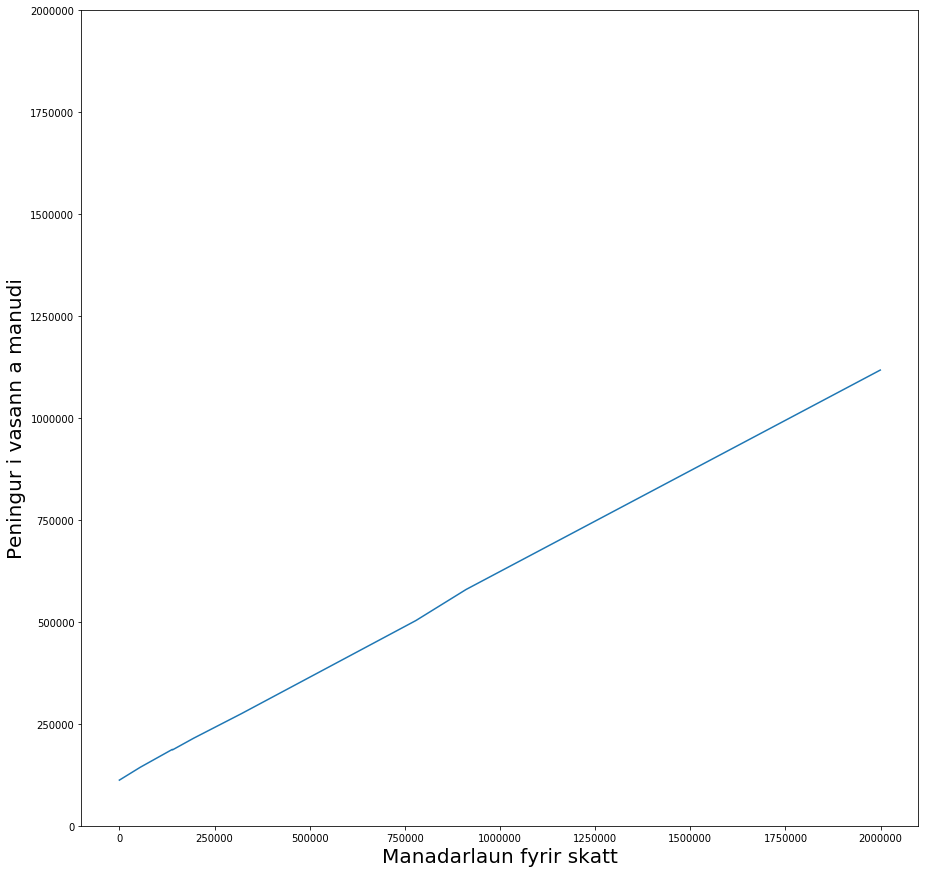

In [32]:
fig=pl.figure(figsize(15,15))
pl.plot(tekjulisti, vasapjenlisti)
pl.xlabel('Manadarlaun fyrir skatt', size=20)
pl.ylabel('Peningur i vasann a manudi', size=20)
pl.ylim(0,2000000)